In [16]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import load_model
from keras.preprocessing import image
#OPEN CV
import cv2
import imutils as imutils
import pandas as pd
import math 
import PIL
import glob
import requests
from keras.preprocessing import image

def converImgToPixel(image_name):
  # using api get rect for grabcut
  api_key = 'acc_c80495573956b44'
  api_secret = '8aaef238ec092e6ba3ae6234314b700c'
  image_path = image_name

  response = requests.post(
      'https://api.imagga.com/v2/croppings',
      auth=(api_key, api_secret),
      params={'no_scaling':1},
      files={'image': open(image_path, 'rb')})
  response.json()
  res = response.json().get('result').get('croppings')[0]
  x1 = res.get('x1')
  x2 = res.get('x2')
  y1 =  res.get('y1')
  y2 = res.get('y2')
  h1 = res.get('target_height')
  w1  = res.get('target_width')
  # using grabcut
  img = cv2.imread(image_name) 
  height, width, channels = img.shape
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  mask = np.zeros(img.shape[:2], np.uint8)
  bgdModel = np.zeros((1, 65), np.float64)
  fgdModel = np.zeros((1, 65), np.float64)
    # rect toa do khung
  rect = (x1,y1,w1,h1)
  cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
  mask2 = np.where((mask==2)|(mask==0), 0,1).astype('uint8')
  img = img*mask2[:,:, np.newaxis]
  img = img[y1:y2,0:width]
  plt.imshow(img)
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray = cv2.resize(img_gray,(28,28))
  pixel_values = img_gray.flatten()
  return pixel_values


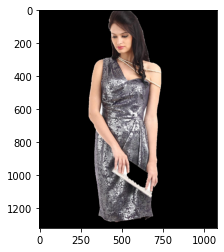

In [17]:
image_list = []
for filename in glob.glob('/content/drive/MyDrive/Dress/*'):
    image_list.append(filename)

# converImgToPixel(image_list[0])
list_pixel =[]
for i in range(0,len(image_list)):
      list_pixel.append(converImgToPixel(image_list[i]))

column=['label']
for i in range(1,785):
  str1 = 'pixel'+str(i)
  column.append(str1)

for i in range(0, len(list_pixel)):
  list_pixel[i]= np.insert(list_pixel[i],0,12)

df_img = pd.DataFrame(columns=column)
for i in range(0, len(list_pixel)):
  df_img.loc[i]= list_pixel[i]
df_img.to_csv("Dress.csv")